In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sdv import SDV
from sdv import Metadata
from matplotlib import pyplot as plt

In [13]:
HOME_PATH = '' #home path of the project
TRAIN_FILE = 'REAL DATASETS/TRAIN DATASETS/B_Cardio_Data_Real_Train.csv'
SYNTHETIC_FILE = 'SYNTHETIC DATASETS/SDV/B_Cardio_Data_Synthetic_SDV.csv'

## 1. Read data

In [3]:
real_data = pd.read_csv(HOME_PATH + TRAIN_FILE)
categorical_columns = ['gender','cholesterol','gluc','smoke','alco','active','cardio']
for col in categorical_columns :
    real_data[col] = real_data[col].astype('category')
data_train = real_data
real_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,67617,21876,1,154,80.0,130,90,2,1,0,0,1,1
1,96320,16717,2,162,70.0,140,90,1,1,0,0,0,1
2,17571,21128,2,174,92.0,150,100,1,1,0,0,1,1
3,46492,23366,2,173,76.0,120,82,1,1,0,0,1,1
4,945,20281,1,160,60.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,53137,16001,2,170,75.0,150,80,1,1,1,0,1,1
55996,8918,23209,2,162,73.0,160,90,1,1,0,0,1,1
55997,78302,23589,1,169,74.0,120,80,1,1,0,0,1,0
55998,1197,18227,1,167,70.0,120,80,1,1,0,0,0,0


In [4]:
real_data.dtypes

id                int64
age               int64
gender         category
height            int64
weight          float64
ap_hi             int64
ap_lo             int64
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio         category
dtype: object

### 1.1. Create metada

In [5]:
metadata = Metadata()
metadata.add_table(name='data', data=real_data, primary_key='')
metadata

Metadata
  root_path: .
  tables: ['data']
  relationships:

In [6]:
tables = dict()
tables['data'] = real_data
tables

{'data':           id    age gender  height  weight  ap_hi  ap_lo cholesterol gluc  \
 0      67617  21876      1     154    80.0    130     90           2    1   
 1      96320  16717      2     162    70.0    140     90           1    1   
 2      17571  21128      2     174    92.0    150    100           1    1   
 3      46492  23366      2     173    76.0    120     82           1    1   
 4        945  20281      1     160    60.0    120     80           1    1   
 ...      ...    ...    ...     ...     ...    ...    ...         ...  ...   
 55995  53137  16001      2     170    75.0    150     80           1    1   
 55996   8918  23209      2     162    73.0    160     90           1    1   
 55997  78302  23589      1     169    74.0    120     80           1    1   
 55998   1197  18227      1     167    70.0    120     80           1    1   
 55999  22556  15114      2     177    64.0    120     80           1    1   
 
       smoke alco active cardio  
 0         0    0   

## 2. Train the model and generate data

In [7]:
sdv = SDV()
sdv.fit(metadata, tables)

In [8]:
samples = sdv.sample()
synthetic_data = samples['data']
synthetic_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,24346,15207,1,159,105.958506,226,58,1,1,0,0,1,1
1,26676,17505,1,162,55.316018,70,241,1,1,0,0,1,1
2,49760,20801,1,166,61.426845,195,-9,1,1,0,0,1,1
3,14459,16731,1,150,55.835405,1,51,1,1,0,0,1,1
4,52249,19696,1,154,69.065784,-75,71,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,78730,17842,2,177,52.629665,260,233,2,1,0,0,0,1
55996,41123,18471,1,171,110.007728,94,273,1,1,0,0,1,1
55997,68825,18308,1,168,48.379405,25,423,1,1,0,0,1,0
55998,45094,17022,1,161,87.505548,-7,202,2,1,0,0,1,1


In [9]:
float_features = ['weight']
for col in float_features :
    synthetic_data[col] = abs(np.round(synthetic_data[col],1))
synthetic_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,24346,15207,1,159,106.0,226,58,1,1,0,0,1,1
1,26676,17505,1,162,55.3,70,241,1,1,0,0,1,1
2,49760,20801,1,166,61.4,195,-9,1,1,0,0,1,1
3,14459,16731,1,150,55.8,1,51,1,1,0,0,1,1
4,52249,19696,1,154,69.1,-75,71,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,78730,17842,2,177,52.6,260,233,2,1,0,0,0,1
55996,41123,18471,1,171,110.0,94,273,1,1,0,0,1,1
55997,68825,18308,1,168,48.4,25,423,1,1,0,0,1,0
55998,45094,17022,1,161,87.5,-7,202,2,1,0,0,1,1


In [10]:
real_data.describe()

,id,age,height,weight,ap_hi,ap_lo
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,49971.932589,19464.929107,164.348125,74.188586,128.737893,97.025536
std,28875.383115,2469.403825,8.187461,14.361142,148.345232,197.976631
min,0.000000,10798.000000,55.000000,22.000000,-140.000000,0.000000
25%,24985.000000,17658.000000,159.000000,65.000000,120.000000,80.000000
50%,49942.000000,19699.000000,165.000000,72.000000,120.000000,80.000000
75%,74990.250000,21325.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,23713.000000,250.000000,200.000000,14020.000000,11000.000000


In [11]:
synthetic_data.describe()

,id,age,height,weight,ap_hi,ap_lo
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,50125.808375,19460.497804,164.324411,74.348295,129.542089,96.004214
std,28910.353482,2475.415648,8.146037,14.347042,148.720367,197.942134
min,-68056.000000,8850.000000,130.000000,10.300000,-505.000000,-723.000000
25%,30708.750000,17791.000000,159.000000,64.700000,30.000000,-38.000000
50%,50019.000000,19451.000000,164.000000,74.300000,130.000000,95.000000
75%,69681.250000,21114.000000,170.000000,84.000000,229.000000,229.000000
max,164474.000000,30722.000000,200.000000,133.300000,748.000000,951.000000


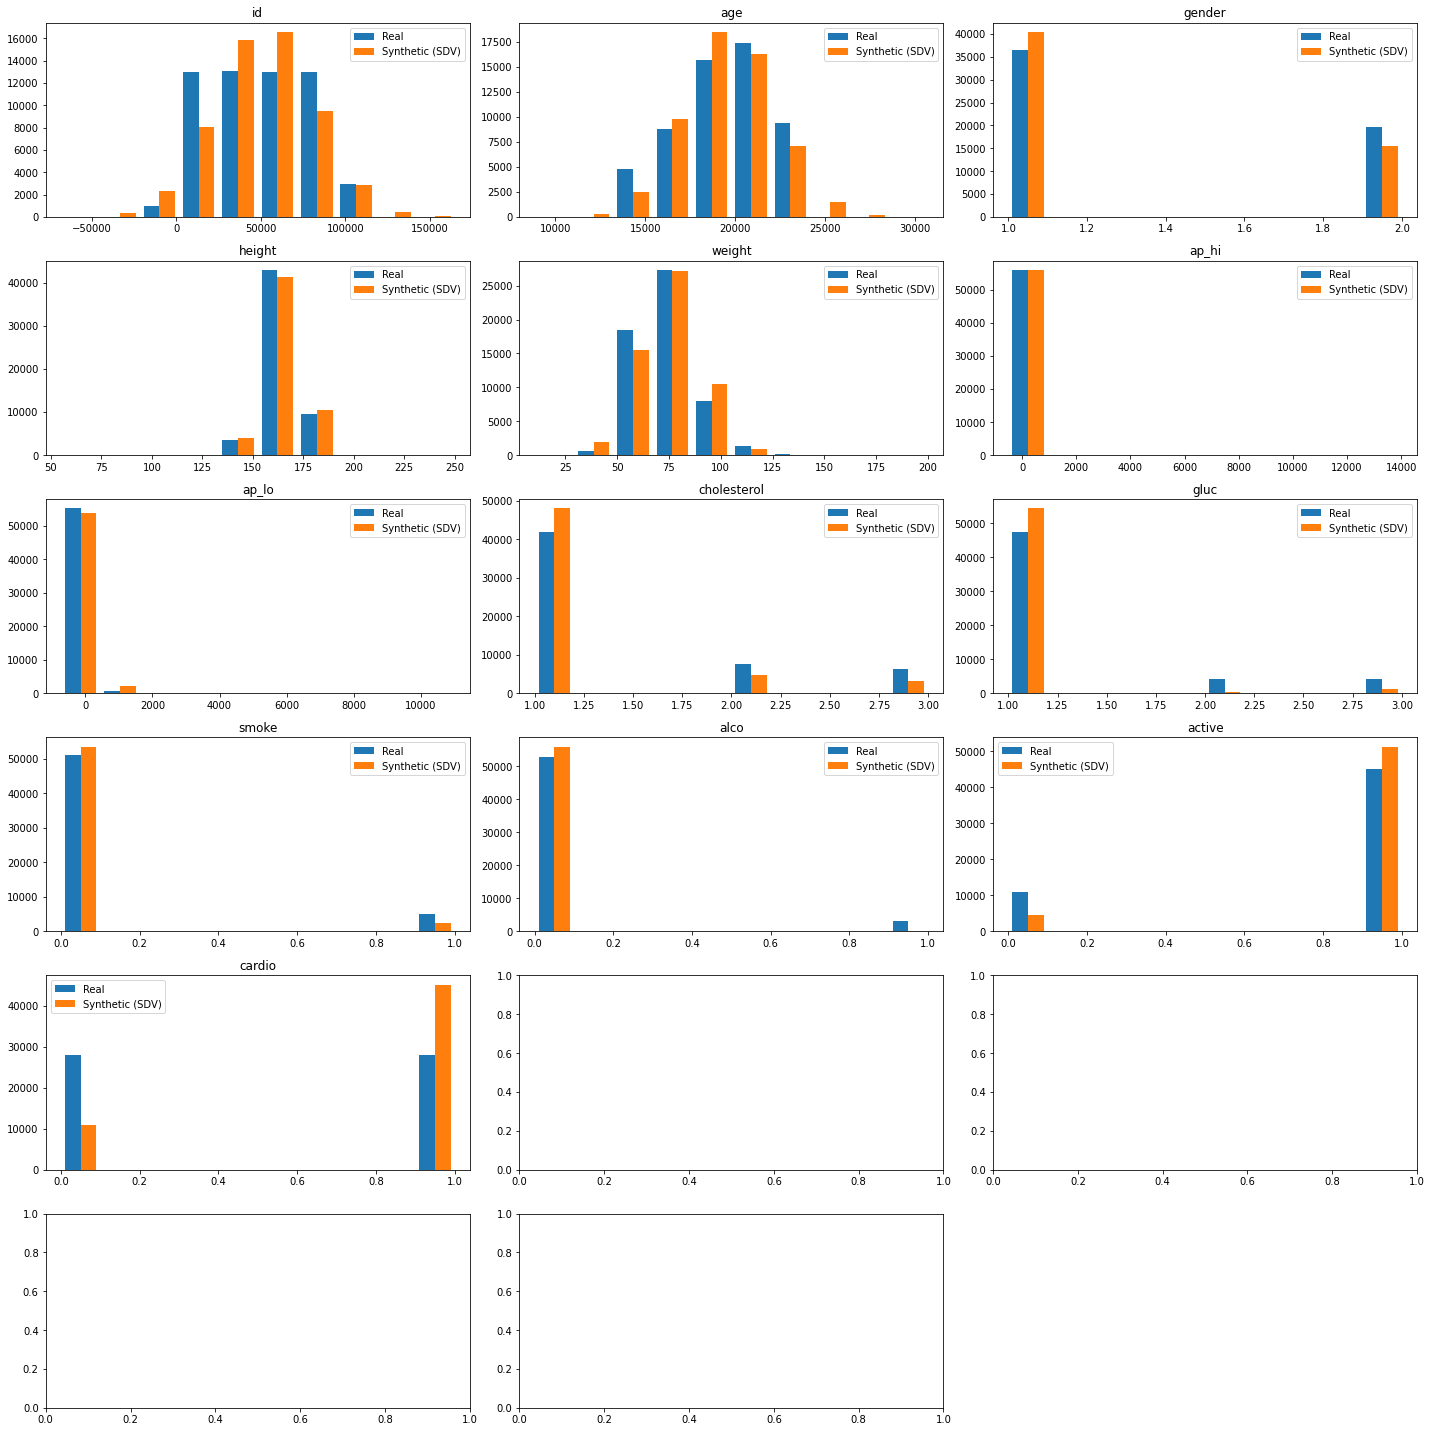

In [12]:
columns = real_data.columns
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20,20))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[1,0], 4:[1,1], 5:[1,2], 6:[2,0], 7:[2,1], 8:[2,2], 9:[3,0], 10:[3,1], 11:[3,2], 12:[4,0],
      13:[4,1], 14:[4,2], 15:[5,0], 16:[5,1]}
for i in range(0,len(columns)) :
    data = np.column_stack((real_data[columns[i]], synthetic_data[columns[i]]))
    axs[idx[i][0], idx[i][1]].hist(data, density=False, histtype='bar', label=['Real','Synthetic (SDV)'])
    axs[idx[i][0], idx[i][1]].set_title(columns[i])
    axs[idx[i][0], idx[i][1]].legend()
fig.delaxes(axs[5,2])
fig.tight_layout(pad=1.1)

In [14]:
synthetic_data.to_csv(HOME_PATH + SYNTHETIC_FILE, index = False)